In [1]:
import pandas as pd
# glob module for wildcards in paths
import glob
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import time
import math
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [3]:
start = time.time()
df = pd.read_csv(r"F:\WestbrookProject\SpaRe\control_group\pre-processing_2023\velocity_based\GazeProcessedMerge_correctedFixations_15_02_25.csv")
end = time.time()
print(end-start)
df

C:\Users\Vincent\AppData\Local\Temp\ipykernel_31232\2052686635.py:2: DtypeWarning: Columns (25,30,38,39,40,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"F:\WestbrookProject\SpaRe\control_group\pre-processing_2023\velocity_based\GazeProcessedMerge_correctedFixations_15_02_25.csv")


263.9459125995636


Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  timeStampRS  \
0                    0             0           0     0.000000   
1                    1             1           1     0.011111   
2                    2             2           2     0.022222   
3                    3             3           3     0.033333   
4                    4             4           4     0.044444   
...                ...           ...         ...          ...   
21066536      21066536      21066536    21066536   600.077778   
21066537      21066537      21066537    21066537   600.088889   
21066538      21066538      21066538    21066538   600.100000   
21066539      21066539      21066539    21066539   600.111111   
21066540      21066540      21066540    21066540   600.122222   

          eyeOpennessLeft  eyeOpennessRight  pupilDiameterMillimetersLeft  \
0                     1.0               1.0                      3.698715   
1                     1.0               1.0                      3.790924   
2                     1.0               1.0                      3.784473   
3                     1.0               1.0                      3.748617   
4                     1.0               1.0                      3.695748   
...                   ...               ...                           ...   
21066536              1.0               1.0                      3.024562   
21066537              1.0               1.0                      2.972967   
21066538              1.0               1.0                      2.962250   
21066539              1.0               1.0                      2.941080   
21066540              1.0               1.0                      2.902588   

          pupilDiameterMillimetersRight  eyePositionCombinedWorld_x  \
0                              4.148895                  -59.137527   
1                              4.124649                  -59.137662   
2                              4.124612                  -59.137514   
3                              4.121073                  -59.135959   
4                              4.107268                  -59.130572   
...                                 ...                         ...   
21066536                       2.846584                  144.161535   
21066537                       2.788579                  144.134964   
21066538                       2.790268                  144.122752   
21066539                       2.801670                  144.102621   
21066540                       2.822403                  144.089493   

          eyePositionCombinedWorld_y  ...  avg_dist  avg_dist_NH  \
0                           2.383395  ...       NaN          NaN   
1                           2.383442  ...  6.320999     6.320999   
2                           2.383491  ...  6.320999     6.320999   
3                           2.383605  ...  6.320999     6.320999   
4                           2.383912  ...  6.320999     6.320999   
...                              ...  ...       ...          ...   
21066536                   -2.669101  ...       NaN          NaN   
21066537                   -2.670622  ...       NaN          NaN   
21066538                   -2.671988  ...       NaN          NaN   
21066539                   -2.672585  ...       NaN          NaN   
21066540                   -2.672975  ...       NaN          NaN   

                   names         namesNH  long_events     SID  Session   ET  \
0                    NaN             NaN          NaN  1004.0      1.0  1.0   
1         pavement_O.002  pavement_O.002     0.481779  1004.0      1.0  1.0   
2         pavement_O.002  pavement_O.002     0.481779  1004.0      1.0  1.0   
3         pavement_O.002  pavement_O.002     0.481779  1004.0      1.0  1.0   
4         pavement_O.002  pavement_O.002     0.481779  1004.0      1.0  1.0   
...                  ...             ...          ...     ...      ...  ...   
21066536             NaN             NaN     0.224830  1080.0      5.0  3.0   
21

In [4]:
fixationSta = df[df['events']==2]
fixationEnd = df[df['events']==-2]
fixationEnd

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  timeStampRS  \
11                  11            11          11     0.122222   
29                  29            29          29     0.322222   
53                  53            53          53     0.588889   
78                  78            78          78     0.866667   
93                  93            93          93     1.033333   
...                ...           ...         ...          ...   
21066435      21066435      21066435    21066435   598.955556   
21066456      21066456      21066456    21066456   599.188889   
21066469      21066469      21066469    21066469   599.333333   
21066486      21066486      21066486    21066486   599.522222   
21066535      21066535      21066535    21066535   600.066667   

          eyeOpennessLeft  eyeOpennessRight  pupilDiameterMillimetersLeft  \
11               1.000000          1.000000                      3.508224   
29               1.000000          1.000000                      3.291763   
53               1.000000          1.000000                      3.169752   
78               1.000000          1.000000                      3.261916   
93               1.000000          1.000000                      3.288693   
...                   ...               ...                           ...   
21066435         1.000000          1.000000                      3.350889   
21066456         0.811951          0.941316                      3.185600   
21066469         1.000000          1.000000                      3.289942   
21066486         1.000000          1.000000                      3.236275   
21066535         1.000000          1.000000                      3.095291   

          pupilDiameterMillimetersRight  eyePositionCombinedWorld_x  \
11                             4.023163                  -59.129589   
29                             3.462769                  -59.102493   
53                             3.356147                  -59.122929   
78                             3.186113                  -59.133687   
93                             3.394790                  -59.144383   
...                                 ...                         ...   
21066435                       3.118198                  148.248575   
21066456                       3.184112                  147.402908   
21066469                       3.076738                  146.896910   
21066486                       3.152729                  146.192366   
21066535                       2.938324                  144.198620   

          eyePositionCombinedWorld_y  ...   avg_dist  avg_dist_NH  \
11                          2.384391  ...   6.320999     6.320999   
29                          2.385613  ...   6.252534     6.252534   
53                          2.386682  ...  22.479572    22.479572   
78                          2.386670  ...  80.757219    80.757219   
93                          2.385067  ...   4.988880     4.988880   
...                              ...  ...        ...          ...   
21066435                   -2.538786  ...  45.445124    45.445124   
21066456                   -2.567250  ...  44.332981    44.332981   
21066469                   -2.584672  ...  45.906980    45.906980   
21066486                   -2.607472  ...  62.605335    62.605335   
21066535                   -2.667751  ...  64.590372    66.137471   

                     names           namesNH   long_events     SID  Session  \
11          pavement_O.002    pavement_O.002  4.817791e-01  1004.0      1.0   
29          pavement_O.002    pavement_O.002  9.635582e-02  1004.0      1.0   
53           terrain_O.001     terrain_O.001  3.854233e-01  1004.0      1.0   
78                Fence_34          Fence_34  7.708466e-01  1004.0      1.0   
93          pavement_O.002    pavement_O.002  4.817791e-01  1004.0      1.0   
...                    ...               ...           ...     ...      ...   
21066435      Building_129      Building_129  6.744908e-01  1080.0   

In [5]:
fixationEnd = fixationEnd[fixationEnd['length']!=0] # deleting all 0-duration fixations, if any
print("Nr. of fixation ends:", len(fixationEnd.length)) 
print('Number of fixation starts:', len(fixationSta.length))
print("Max:",max(fixationEnd.length))
print('Min',min(fixationEnd.length))
print("Mean",np.mean(fixationEnd.length))
print('Median',np.median(fixationEnd.length))
print('SD:',np.std(fixationEnd.length))
print('MAD:',stats.median_abs_deviation(fixationEnd.length, scale=1))

Nr. of fixation ends: 807117
Number of fixation starts: 807117
Max: 5.866666666665993
Min 0.0111111111111111
Mean 0.20036891250655756
Median 0.1666666666660177
SD: 0.15674083813937412
MAD: 0.0777777777779391


5.866666666665993


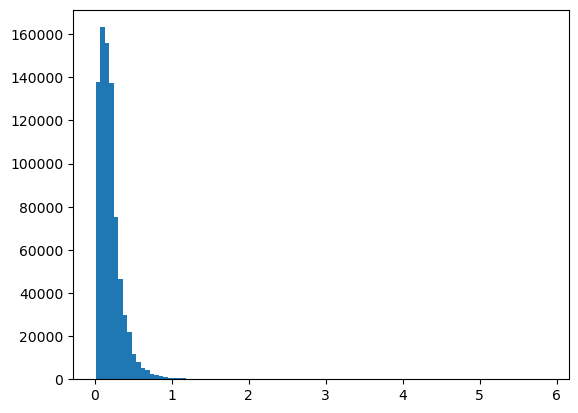

In [6]:
plt.hist(fixationEnd.length, bins=100)
print(max(fixationEnd.length))
plt.show()

5.866666666665993


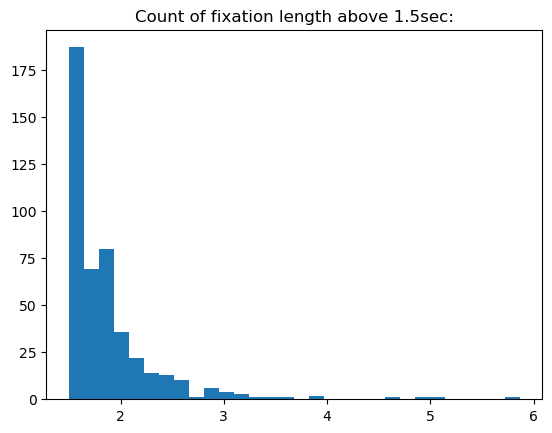

In [7]:
fixationEnd.loc[:,'length'].astype('int64')
VeryLongFixs = fixationEnd[fixationEnd.loc[:,'length']>1.5]
plt.hist(VeryLongFixs.length, bins=30)
print(max(VeryLongFixs.length))
plt.title('Count of fixation length above 1.5sec:')
plt.show()

In [27]:
# Meadian, SID & quantiles
SIDs = []
meds = []
p25s = []
p75s = []

for subject in np.unique(fixationEnd.SID):
    df_subj = fixationEnd[fixationEnd['SID'] == subject]
    med = np.nanmedian(df_subj.length)
    p25 = np.quantile(df_subj.length, 0.25)
    p75 = np.quantile(df_subj.length, 0.75)
    SIDs.append(subject)
    meds.append(med)
    p25s.append(p25)
    p75s.append(p75)
    
df_FixDur = pd.DataFrame()
df_FixDur['SID'] = SIDs
df_FixDur['FixationDuration_25%'] = p25s
df_FixDur['FixationDuration_med'] = meds
df_FixDur['FixationDuration_75%'] = p75s
df_FixDur

SID  FixationDuration_25%  FixationDuration_med  FixationDuration_75%
0   1004.0              0.088889              0.155556              0.233333
1   1005.0              0.077778              0.144444              0.244444
2   1008.0              0.088889              0.166667              0.255556
3   1010.0              0.088889              0.166667              0.266667
4   1011.0              0.111111              0.188889              0.288889
5   1013.0              0.100000              0.155556              0.255556
6   1017.0              0.111111              0.188889              0.300000
7   1018.0              0.100000              0.166667              0.255556
8   1019.0              0.088889              0.155556              0.233333
9   1021.0              0.088889              0.155556              0.244444
10  1022.0              0.100000              0.177778              0.266667
11  1023.0              0.083333              0.155556              0.255556
12  1054.0              0.100000              0.166667              0.266667
13  1055.0              0.088889              0.155556              0.255556
14  1056.0              0.088889              0.155556              0.244444
15  1057.0              0.088889              0.166667              0.277778
16  1058.0              0.088889              0.155556              0.244444
17  1068.0              0.100000              0.188889              0.288889
18  1069.0              0.100000              0.155556              0.244444
19  1072.0              0.088889              0.166667              0.255556
20  1073.0              0.088889              0.144444              0.222222
21  1074.0              0.100000              0.177778              0.266667
22  1075.0              0.088889              0.155556              0.244444
23  1077.0              0.088889              0.177778              0.277778
24  1079.0              0.100000              0.177778              0.277778
25  1080.0              0.088889              0.155556              0.255556

In [29]:
# Calculate distance between 25th perceptile and 75th percentile & the Bowley coefficient to account for skew
df_FixDur['FixationDuration_DistQ1-Q3'] = df_FixDur['FixationDuration_75%'] - df_FixDur['FixationDuration_25%']
# BOWLEY COEFFICIENT: ranges from -1 to 1, with 0 indicating a symmetrical distribution, negative values indicating a left skew, and positive values indicating a right skew
df_FixDur['FixationDuration_bowleyCoef'] = (df_FixDur['FixationDuration_75%'] + df_FixDur['FixationDuration_25%'] - 2*df_FixDur['FixationDuration_med']) / df_FixDur['FixationDuration_DistQ1-Q3']

# drop columns not used in further analysis:
df_FixDur = df_FixDur.drop(['FixationDuration_25%', 'FixationDuration_75%'], axis=1)
df_FixDur

SID  FixationDuration_med  FixationDuration_DistQ1-Q3  \
0   1004.0              0.155556                    0.144444   
1   1005.0              0.144444                    0.166667   
2   1008.0              0.166667                    0.166667   
3   1010.0              0.166667                    0.177778   
4   1011.0              0.188889                    0.177778   
5   1013.0              0.155556                    0.155556   
6   1017.0              0.188889                    0.188889   
7   1018.0              0.166667                    0.155556   
8   1019.0              0.155556                    0.144444   
9   1021.0              0.155556                    0.155556   
10  1022.0              0.177778                    0.166667   
11  1023.0              0.155556                    0.172222   
12  1054.0              0.166667                    0.166667   
13  1055.0              0.155556                    0.166667   
14  1056.0              0.155556                    0.155556   
15  1057.0              0.166667                    0.188889   
16  1058.0              0.155556                    0.155556   
17  1068.0              0.188889                    0.188889   
18  1069.0              0.155556                    0.144444   
19  1072.0              0.166667                    0.166667   
20  1073.0              0.144444                    0.133333   
21  1074.0              0.177778                    0.166667   
22  1075.0              0.155556                    0.155556   
23  1077.0              0.177778                    0.188889   
24  1079.0              0.177778                    0.177778   
25  1080.0              0.155556                    0.166667   

    FixationDuration_bowleyCoef  
0                      0.076923  
1                      0.200000  
2                      0.066667  
3                      0.125000  
4                      0.125000  
5                      0.285714  
6                      0.176471  
7                      0.142857  
8                      0.076923  
9                      0.142857  
10                     0.066667  
11                     0.161290  
12                     0.200000  
13                     0.200000  
14                     0.142857  
15                     0.176471  
16                     0.142857  
17                     0.058824  
18                     0.230769  
19                     0.066667  
20                     0.166667  
21                     0.066667  
22                     0.142857  
23                     0.058824  
24                     0.125000  
25                     0.200000

In [31]:
###SAVING###
df_FixDur.to_csv(r"C:\Users\Vincent\Documents\Dynamic_VS_Static_Viewing\FinalAnalysis\Preprocessing_ET\ResultingDataFrames\FixationDuration.csv")

In [31]:
###SAVING###
df_FixDur.to_csv(r"C:\Users\Vincent\Documents\Dynamic_VS_Static_Viewing\FinalAnalysis\Preprocessing_ET\ResultingDataFrames\FixationDuration.csv")